In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the data with full model information under each month
to_str_list = ['class_id','brand_id','type_id','level_id','department_id','TR','driven_type_id',
            'fuel_type_id','newenergy_type_id','emission_standards_id','if_MPV_id',
            'if_luxurious_id','cylinder_number','rated_passenger','compartment','year','month']
dtype_dict = {i:str for i in to_str_list}
full_data_df = pd.read_csv("clean_data/yancheng_train_20171226_02042018.csv", header=0, dtype=dtype_dict)
full_data_df.shape

(76018, 33)

In [4]:
# This cell is to test the cyclical and seasonal patterns
from statsmodels.tsa.stattools import adfuller

test = full_data_df.groupby(['class_id','year','month']).sum()['sale_quantity'].reset_index()
class_id_list = list(test.class_id.unique())
stat_list = []
error_list = []
for i in class_id_list:
    temp = test[test['class_id']==i]
    temp.index = pd.to_datetime([temp.iloc[i,1]+temp.iloc[i,2] for i in range(temp.shape[0])],
                                format='%Y%m')
    temp.sort_index(inplace=True)
    try:
        dftest = adfuller(temp['sale_quantity'], autolag='AIC')
        if dftest[1] < 0.05:
            stat_list.append([i, dftest[2]])
    except ValueError:
        error_list.append(i)
print(stat_list)
print(error_list)

C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\xuchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


[['103507', 0], ['124140', 4], ['175962', 1], ['209945', 1], ['219195', 0], ['221795', 0], ['270690', 0], ['281792', 0], ['289386', 0], ['348641', 0], ['350259', 1], ['354068', 0], ['360648', 0], ['379876', 0], ['384924', 1], ['401052', 0], ['436105', 0], ['482497', 0], ['496459', 0], ['559132', 0], ['576298', 0], ['580470', 0], ['587678', 0], ['591790', 1], ['649213', 0], ['671482', 0], ['682651', 2], ['692703', 0], ['714860', 0], ['739296', 0], ['741152', 0], ['745137', 1], ['810398', 0], ['819061', 3], ['871642', 0], ['883691', 1], ['924154', 10], ['961362', 1], ['961962', 0], ['963845', 0], ['978089', 0]]
['169673', '194201', '340175', '359378', '376193', '417803', '437063', '612523', '653436', '687270', '714150', '725137', '789290', '842246', '854548', '861459', '872180', '905061']


Test Statistic                 -2.804119
p-value                         0.057688
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


C:\Users\xuchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


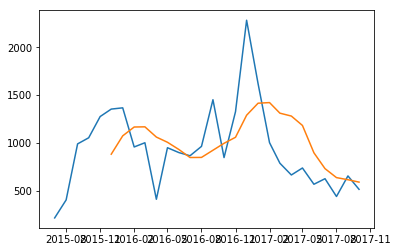

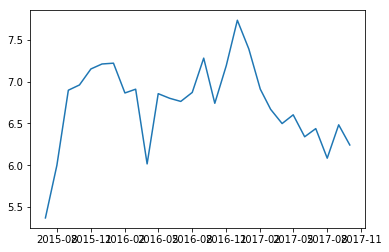

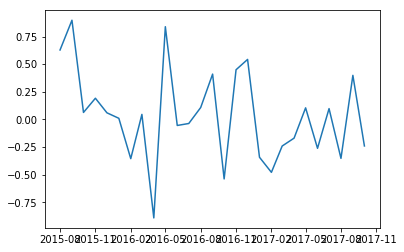

Test Statistic                -5.780249e+00
p-value                        5.145822e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


In [15]:
test1 = test[test['class_id']=='654134']
# test1['date'] = pd.to_datetime([test.iloc[i,1]+test.iloc[i,2] for i in range(test1.shape[0])],format='%Y%m')
test1.index = pd.to_datetime([test1.iloc[i,1]+test1.iloc[i,2] for i in range(test1.shape[0])],format='%Y%m')
test1.sort_index(inplace=True)
plt.figure(1)
plt.plot(test1.index, test1['sale_quantity'], test1.index, test1['sale_quantity'].rolling(6).mean())

dftest = adfuller(test1['sale_quantity'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
ts = test1['sale_quantity']
ts_log = np.log(test1['sale_quantity'])
ts_log_diff = ts_log - ts_log.shift()
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
plt.figure(2)
plt.plot(test1.index, ts_log)
plt.figure(3)
plt.plot(test1.index, ts_log_diff)
plt.show()

ts_log_diff.dropna(inplace=True)
dftest = adfuller(ts_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

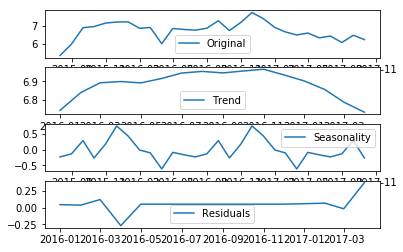

Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
dftest = adfuller(ts_log_decompose, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

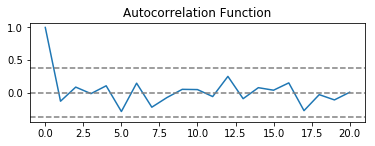

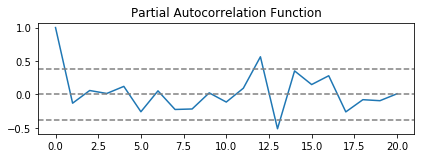

In [28]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF:
plt.figure(1)
plt.subplot(211) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.figure(2)
plt.subplot(212)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\xuchu\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_r

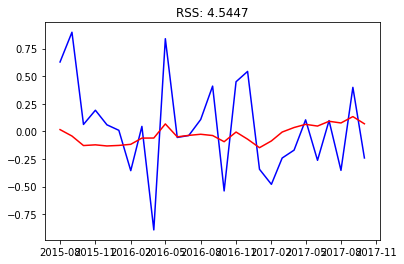

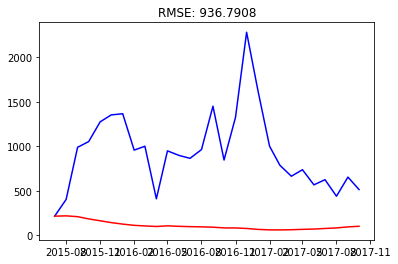

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.figure(1)
plt.plot(ts_log_diff, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(2)
plt.plot(ts,color='blue')
plt.plot(predictions_ARIMA, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()

In [ ]:
predictions_ARIMA